# Performance Graph Comparison

In [1]:
import sys
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load ค่า Accuracy, F1 Score, Precision, และ Recall ที่ได้จากการประเมิน classification models ได้แก่:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Naïve Bayes
- Decision Tree
- Random Forest

In [3]:
df_model_Logit = pd.read_csv('./eval_results/eval_results_Logit.csv',index_col=0)
df_model_KNN = pd.read_csv('./eval_results/eval_results_KNN.csv',index_col=0)
df_model_SVM = pd.read_csv('./eval_results/eval_results_SVM.csv',index_col=0)
df_model_NB = pd.read_csv('./eval_results/eval_results_NB.csv',index_col=0)
df_model_DT = pd.read_csv('./eval_results/eval_results_DT.csv',index_col=0)
df_model_RF = pd.read_csv('./eval_results/eval_results_RF.csv',index_col=0)

## เปรียบเทียบค่า Accuracy, F1 Score, Precision, และ Recall ของ models ต่าง ๆ

In [4]:
df_model_compare = pd.concat([df_model_Logit,
                              df_model_KNN,
                              df_model_SVM,
                              df_model_NB,
                              df_model_DT,
                              df_model_RF
                             ], axis=1)
df_model_compare

,Logit,KNN,SVM,NB,DT,RF
Accuracy,0.828198,0.835509,0.859530,0.839164,0.848564,0.855352
F1 Score,0.415631,0.468803,0.573693,0.486667,0.598338,0.594436
Precision,0.759740,0.755435,0.815315,0.764398,0.690096,0.740876
Recall,0.286064,0.339853,0.442543,0.356968,0.528117,0.496333


แสดงกราฟเปรียบเทียบค่า Accuracy, F1 Score, Precision, และ Recall:

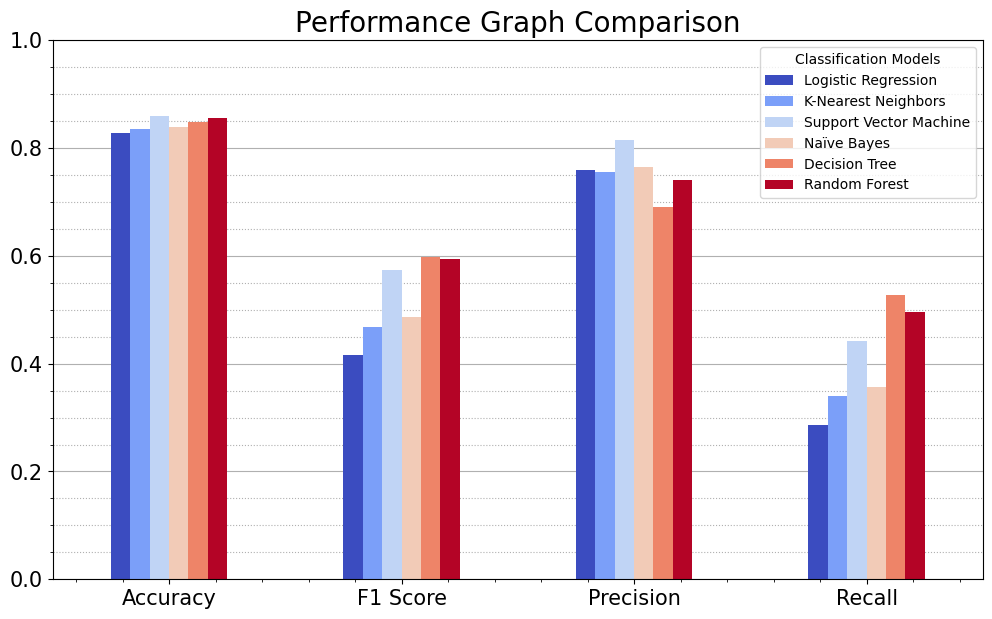

In [5]:
ax = df_model_compare.plot(
    kind='bar', cmap='coolwarm', rot=0,
    ylim=(0,1), figsize = (12,7), fontsize=15
)
ax.set_axisbelow(True)
ax.grid(linestyle='-', axis='y')
ax.legend(fontsize=12)

plt.minorticks_on()
plt.grid(which='minor', axis='y',ls=':')
plt.legend(['Logistic Regression',
            'K-Nearest Neighbors',
            'Support Vector Machine',
            'Naïve Bayes',
            'Decision Tree',
            'Random Forest'
           ], title='Classification Models')
plt.title('Performance Graph Comparison', fontsize=20)
plt.savefig('./img/graph')
plt.show()

สำหรับ dataset นี้:
- Recall สำคัญกว่า Precision เพราะ Recall พิจารณา False Negative
    - Recall คือ จำนวนที่ทำนายถูกว่า churn จากความจริงที่เป็น churn ทั้งหมด
    - False Negative สำคัญ เพราะทำนายว่า non-churn แต่ความจริงคือ churn
        - ทำนายผิดแบบนี้ ธนาคารจะไม่มีมาตรการรักษาหรือดึงดูดลูกค้าคนนี้จนเขาเลิกใช้ธนาคาร (churn) ได้
    - ต้องพยายามทำให้ False Negative ต่ำ ๆ และ True Positive สูง ๆ

แต่ในขณะเดียวกัน:
- Precision ก็สำคัญ เพราะ Precision พิจารณา False Positive
    - Precision คือ จำนวนที่ทายถูกว่า churn จากจำนวนที่ทายว่า churn ทั้งหมด
    - False Positive คือทำนายว่า churn แต่ความจริงคือ non-churn
        - ทำนายผิดแบบนี้ จะทำให้ธนาคารสูญเสียทรัพยากรไปกับมาตรการรักษาหรือดึงดูดลูกค้าที่เขาไม่ได้จะเลิกใช้ธนาคาร และยังอาจทำให้ลูกค้ารู้สึกรำคาญโดยไม่จำเป็นอีกด้วย

**นั่นคือ:**

- สำหรับ dataset นี้ model ชนิด Decision Tree และ Random Forest ทำนายได้ดีที่สุดเนื่องจากค่า Recall และ Precision สูงทั้งคู่ และเมื่อพิจารณา F1 Score (ค่า balance ของ Precision กับ Recall) ก็ให้ค่าที่สูงสุดเช่นกัน
- ค่า F1 Score ของทั้ง Decision Tree และ Random Forest มีค่าอยู่ที่ประมาณ 60% ทั้งคู่
- Model ชนิด Decision Tree จะได้ค่า Recall ที่สูงกว่าอีกประมาณ 5%
- Model ชนิด Random Forest จะได้ค่า Precision ที่สูงกว่าอีกประมาณ 3%

**ชุดข้อมูลนี้มีสัดส่วนข้อมูลไม่สมดุล (imbalanced dataset) เนื่องจากในชุดข้อมูลนี้ มีลูกค้าที่เลิกใช้ธนาคารประมาณ 20% และลูกค้าที่อยู่ต่อมีประมาณ 80% ดังนั้นการทำนายว่าลูกค้าจะเลิกใช้ธนาคาร (churn) ไหม จะยากกว่าการทำนายว่าลูกค้าจะอยู่ต่อไหม**

---

**ตารางอธิบายความหมายของค่า Accuracy, F1 Score, Precision, และ Recall:**

|Evaluation Metrics| |
|:-:|---|
|$$Accuracy = \frac{TN+TP}{TP+TN+FP+FN}$$ | (ทายถูก) / (ทั้งหมด) <br>ใช้ดีกรณีที่ dataset มี pos. กับ neg. พอๆกัน (Balanced Dataset) |
|$$Precision = \frac{TP}{TP+FP}$$ | ทายถูกว่า positive / ทายว่า positive ทั้งหมด |
|$$Recall = \frac{TP}{TP+FN}$$ | ทายถูกว่า positive / ความจริงที่เป็น positive ทั้งหมด |
|$$F1 Score = 2\times\frac{Precision\times Recall}{Precision+Recall}$$ | ค่า balance ของ Precision และ Recall <br>หลายงานวิจัยใช้ค่านี้ เพราะบาง dataset ค่า Accuracy วัดผลได้ไม่ดี|